<a href="https://colab.research.google.com/github/hrajaoberison/MLWS_S19/blob/master/Legendre2DMap/Legendre2DMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!/usr/bin/env python3
 -*- coding: utf-8 -*-
"""
Created on Thu Jul 25 14:03:37 2019

@author: hrajaoberison
"""

This function produces a sum of 2D Legendre polynomias weighted by the coefficients in v_coef. Should replicate the behavior of LegendreMap, written by Seung-Whan Bahk.

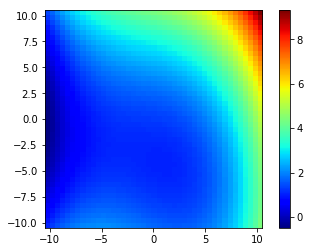

In [0]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

xv = np.array([np.arange(-10.5,11,0.5)])
yv = xv

Xm, Ym = np.meshgrid(xv,yv)

v_coeff = np.array([[3,3,2,1.5,1.5,1.5,1.5]])
v_region = np.array([[1,1,12,12]])

def Legendre2DMap(v_coeff, Xm, Ym, v_region):
    if Xm.shape != Ym.shape:
        raise ValueError('Incompatible x and y matrices!')
        
    Xm_grid = (Xm - v_region[0,0])/v_region[0,2]
    Ym_grid = (Ym - v_region[0,1])/v_region[0,3]
    
    M_out = np.zeros(Xm.shape)
    
    j_ap = np.array(np.where(np.abs(Xm_grid[0,:])<=1))
    i_ap = np.array(np.where(np.abs(Ym_grid[:,0])<=1)).conj().transpose()
    
    # Loop through coefficients
    n=0
    for k in range(1, max(v_coeff.shape)+1):
        if k > np.sum(np.linspace(1,n+1,n+1))+0.1:
          n= n+1 
        j_k = (k-1)-np.sum(np.linspace(1,n,n))
        i_k = n - j_k
        vlx = special.lpmv(0, i_k, Xm_grid[0, j_ap])
        vlx = np.squeeze(vlx[0,:]).reshape((1,max(vlx.shape)))

        vly = special.lpmv(0, j_k, Ym_grid[i_ap, 1].conj().transpose())
        vly = np.squeeze(vly[0,:]).reshape((1,max(vly.shape)))
        
        Pm_k = (vly.conj().transpose())*vlx
        M_out = M_out + v_coeff[0, k-1]*Pm_k
    return M_out
if __name__ == "__main__":
  args = (v_coeff, Xm, Ym, v_region)
  M_out = Legendre2DMap(*args)
  plt.figure(211)
  extent = np.min(xv), np.max(xv), np.min(yv), np.max(yv)
  im = plt.imshow(np.flipud(M_out), extent=extent, cmap='jet')
  plt.colorbar(im)
  plt.show()